In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import load_sample_image
from sklearn.utils import shuffle
from sklearn.metrics import pairwise_distances_argmin
from PIL import Image

In [2]:
custom_image_path = r"C:\Users\Suyash Tambe\Desktop\Unspervised learning\4-GoldenGateBridge.jpg"
custom_image = Image.open(custom_image_path)

In [3]:
custom_image = np.array(custom_image, dtype=np.float64) / 255

In [4]:
w, h, d = original_shape = tuple(custom_image.shape)
image_array = np.reshape(custom_image, (w * h, d))


In [5]:
n_colors = 256

In [6]:
kmeans = KMeans(n_clusters=n_colors, random_state=42)
kmeans.fit(image_array)

C:\Users\Suyash Tambe\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=256, random_state=42)

In [7]:
labels = kmeans.predict(image_array)

In [8]:
compressed_palette = kmeans.cluster_centers_
compressed_image = np.reshape(compressed_palette[labels], (w, h, d))


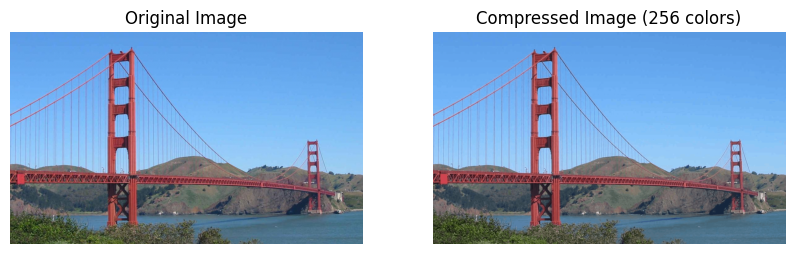

In [9]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(custom_image)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Compressed Image ({} colors)'.format(n_colors))
plt.imshow(compressed_image)
plt.axis('off')

plt.show()

**Observations-**

1) Color Reduction: Simplifying the color palette by reducing the number of colors resulted in a noticeable simplification across the image. This simplification can potentially lead to a loss of detail, particularly in regions with subtle color variations.

2) Impact on Sky and Water: The effect of color reduction was prominently observed in areas like the sky and water, which often have smooth color gradients. Depending on the number of color clusters chosen, this reduction can cause banding or a loss of smoothness in these regions.

3) Preservation of Key Features: Despite compression, critical features of the Golden Gate Bridge, such as its distinctive red-orange color and structural details, remained intact.

4) Variation with n_colors: Adjusting the n_colors parameter revealed that reducing the color palette can result in decreased color fidelity, particularly in areas like the sky, water, and landscape where subtle color variations are present.

5) Decreased Color Fidelity: Lower n_colors values were observed to further diminish color fidelity, particularly in regions with subtle color variations such as the sky, water, and landscape.





